# i start by installing the needed backages 

In [1]:
# IMPORT THE NEEDED PACKAGES

# import pandas library and assign it to "pd"
#Pandas is a powerful data manipulation library used for data analysis and manipulation.
import pandas as pd
# import numpy library and assign it to "np"
#NumPy is a powerful library used for scientific computing and numerical operations.
import numpy as np
#Matplotlib used for visualzations 
#pyplot is the interface where the visualizations will be created
import matplotlib.pyplot as plt

#Seaborn is often used for creating more aesthetically pleasing visualizations.
import seaborn as sns

#The "norm" function is used for creating a normal probability distribution.
from scipy.stats import norm
#Imports the "stats" module from the SciPy library, which provides a variety of statistical functions.
from scipy import stats
# Imports the "preprocessing" module from the scikit-learn library, which is used for preprocessing data.
from sklearn import preprocessing
#Imports the "StandardScaler" class from the "preprocessing" module of the scikit-learn library. 
#The "StandardScaler" class is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import LabelEncoder
# The "StandardScaler" class is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

#this package needed for spliting the dataset into test and train
from sklearn.model_selection import train_test_split
#he "KFold" class is used for cross-validation, which involves splitting data into "k" subsets and using each subset as a test set while using the remaining subsets as training sets.
from sklearn.model_selection import KFold
#The "GridSearchCV" class is used for performing grid search, which involves testing different hyperparameters to find the best combination for a given model.
from sklearn.model_selection import GridSearchCV
#The "ExtraTreesClassifier" class is a type of ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy.
from sklearn.ensemble import ExtraTreesClassifier
#it is used for building a linear regression model.
from sklearn.linear_model import LinearRegression
# it is used for feature engineering by generating polynomial and interaction features.
from sklearn.preprocessing import PolynomialFeatures
#used for building a ridge regression model
from sklearn.linear_model import Ridge
#used for building a Lasso regression model.
from sklearn.linear_model import Lasso
#build an Elastic Net regression model
from sklearn.linear_model import ElasticNet
#provides a range of evaluation metrics for machine learning models
from sklearn import metrics
#it is used for evaluating the performance of a regression model by calculating the mean squared error between the predicted and actual values
from sklearn.metrics import mean_squared_error
# it is used for evaluating the performance of a regression model by calculating the mean absolute error between the predicted and actual values
from sklearn.metrics import mean_absolute_error
#Imports the square root function from the math
from math import sqrt
#give me the performance of the model
from sklearn.metrics import r2_score

# Import the dataset that i will work on it

In [2]:
#import the dataset
airbnb=pd.read_csv('C:\\Users\\Admin\\Desktop\\AB_NYC_2019.csv')


# GET AN OVERVIEW ABOUT THE DATASET 

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# get an idea about the informations that exists in my dataset
#get a general overview about my dataset the types that exists in the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#this command gives more details about my dataset's columns the mean , the min the maximum ...
airbnb.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# DATA CLEANING

In [6]:

#now i'm gonna drop the unecessary rows 
airbnb.drop(['id','name','host_name','last_review','latitude','longitude'], axis=1, inplace=True)



# Missing data


In [7]:
#now i'm gonna check the null values in the rest of rows 
airbnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# from the last result that showed up i interpate that there is a lot's of missing data for the "reviews_per_month" column

In [8]:
# to take the right decision to replace the lissing values i need an overview about the statistics ablout the dataset
airbnb.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# i decided to replace the missing data with the mean since the data is more symmetric.

In [9]:
mean = airbnb['reviews_per_month'].mean()
airbnb['reviews_per_month'].fillna(mean, inplace=True)
#after replacing the missing values in the "reviews_per_month" column have as result no null value
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
#drop all the NAN rows
airbnb.dropna(how='any',inplace=True)

In [11]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.7+ MB


In [12]:
#in this step i remove all the duplicated rows

airbnb.duplicated().sum()
#this command drops all the duplicated rows and "inplace=true" have role of modifing the dataset directly without creating a copy of it
airbnb.drop_duplicates(inplace=True)

In [13]:
airbnb.head()
#checl the updates

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1,0


<Axes: xlabel='host_id', ylabel='price'>

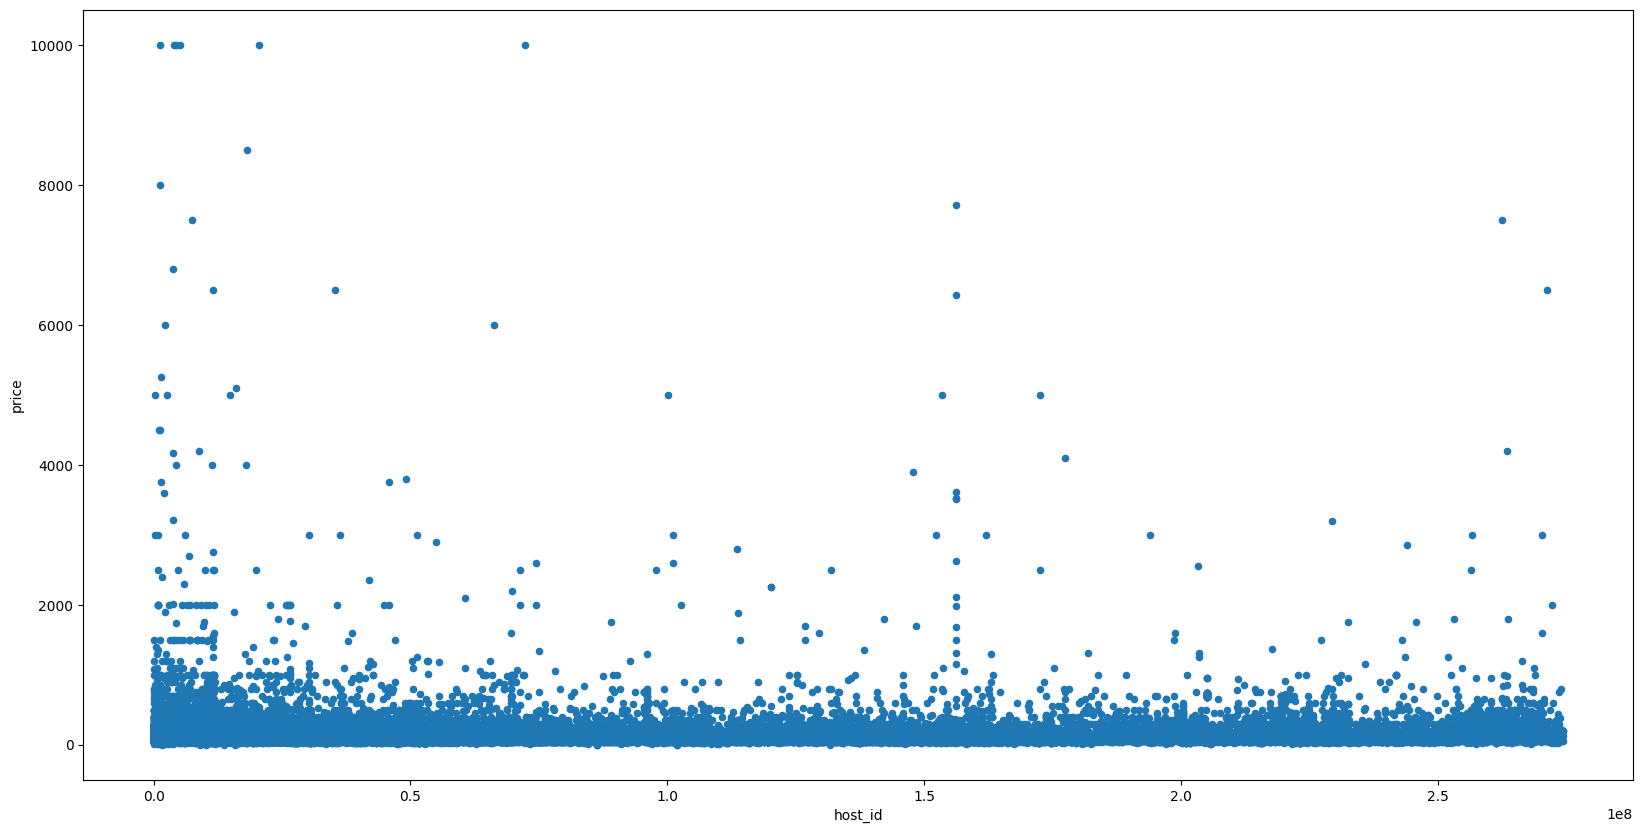

In [14]:
airbnb[['host_id','price']].plot(kind='scatter',x='host_id',y='price',figsize=(20,10))
#This code will create a scatter plot of the host_id on the x-axis and price on the y-axis from the airbnb dataframe using the plot function from pands

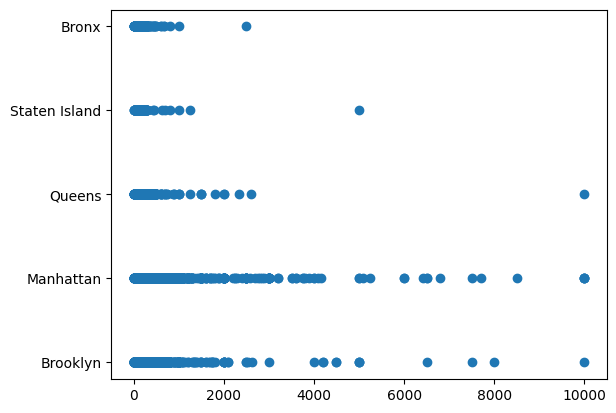

In [15]:
plt.scatter(airbnb['price'],airbnb['neighbourhood_group'])

 shows the relationship between the price of Airbnb listings and their corresponding neighborhood group

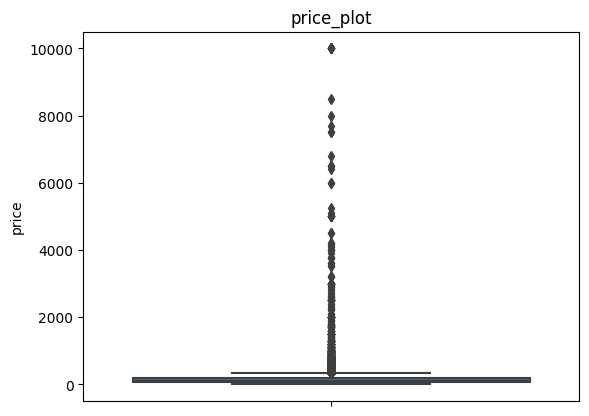

In [16]:
#here i want to detect if there any outlines and the average of price
sns.boxplot(y=airbnb["price"])
plt.title("price_plot")
plt.show()


In [ ]:
#based on the graph i predect that there are too much outlines that may effect the quality of the prediction soo now i'm gonna clean my column "price" from outlines

In [17]:
#i'm gonna start y searching the limits of the column "price"
#i'm gonna start by calculating  the IQR of "price" and returns the upper and lower boundaries as a tuple with the upper boundary first and the lower boundary second
def find_boundaries_price(airbnb,variable,distance):
    IQR = airbnb[variable].quantile(0.75) - airbnb[variable].quantile(0.25)
    lower_boundary_price = airbnb[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_price = airbnb[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary_price, lower_boundary_price


In [18]:
#upper_boundary_price, lower_boundary_price = find_boundaries_price(airbnb,"price", 1.5)
upper_boundary_price, lower_boundary_price = find_boundaries_price(airbnb, "price", 1.5)
outliers_price = np.where((airbnb["price"] > upper_boundary_price) | (airbnb["price"] < lower_boundary_price), True, False)


In [19]:
#those are the limits of price
upper_boundary_price, lower_boundary_price


(334.0, -90.0)

In [ ]:
#this command return false for all values that are < upper_price or > lower price 
#outliers_price = np.where(airbnb["price"] > upper_boundary_price, True, np.where(airbnb["price"] < lower_boundary_price, True, False))


In [20]:
#as expected there are too much outliers that is detected with theapperence of too much false 
outliers_price


array([False, False, False, ..., False, False, False])

In [21]:
#outliers_airbnb_price = airbnb.loc[outliers_price,"price"]
airbnb = airbnb.loc[~outliers_price]


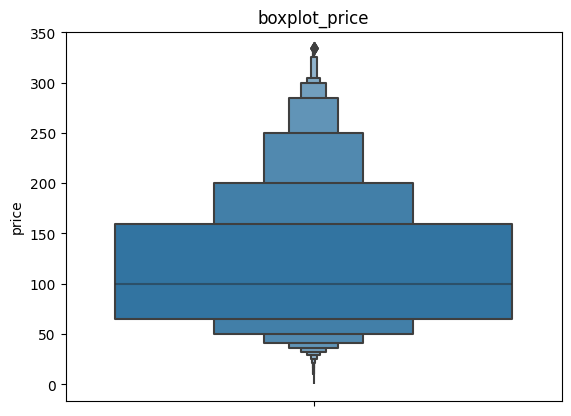

In [22]:
sns.boxenplot(y=airbnb["price"])
plt.title("boxplot_price")
plt.show()

In [23]:

airbnb

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,1.373221,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,1.373221,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,1.373221,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,1.373221,6,2


In [24]:
airbnb = airbnb.drop(airbnb[airbnb['price'] == 0].index)


In [25]:
# select rows with negative or null price
mask = (airbnb['price'] <= 0) | (airbnb['price'].isnull())
invalid_prices = airbnb[mask]

# print the selected rows
print(invalid_prices)


Empty DataFrame
Columns: [host_id, neighbourhood_group, neighbourhood, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [26]:
airbnb.loc[(airbnb['price'] > 0) & (airbnb['price'] <= 335), 'price_N'] = airbnb['price']


In [27]:
#now i want to verify the value of the lines that contain values outline
mask = (airbnb['price'] >335 )
invalid_prices = airbnb[mask]


print(invalid_prices)


Empty DataFrame
Columns: [host_id, neighbourhood_group, neighbourhood, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, price_N]
Index: []


In [28]:
#drop all the lines that contain NAN value in price_N
airbnb = airbnb.dropna(subset=['price_N'])


In [29]:
#now i want to verify the value of the lines that contain values outline
mask = (airbnb['price'] >335 )
invalid_prices = airbnb[mask]


print(invalid_prices)


Empty DataFrame
Columns: [host_id, neighbourhood_group, neighbourhood, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, price_N]
Index: []


In [30]:
airbnb.drop('price', axis=1, inplace=True)


In [31]:
airbnb.head(20)

,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_N
0,2787,Brooklyn,Kensington,Private room,1,9,0.210000,6,365,149.0
1,2845,Manhattan,Midtown,Entire home/apt,1,45,0.380000,2,355,225.0
2,4632,Manhattan,Harlem,Private room,3,0,1.373221,1,365,150.0
3,4869,Brooklyn,Clinton Hill,Entire home/apt,1,270,4.640000,1,194,89.0
4,7192,Manhattan,East Harlem,Entire home/apt,10,9,0.100000,1,0,80.0
5,7322,Manhattan,Murray Hill,Entire home/apt,3,74,0.590000,1,129,200.0
6,7356,Brooklyn,Bedford-Stuyvesant,Private room,45,49,0.400000,1,0,60.0
7,8967,Manhattan,Hell's Kitchen,Private room,2,430,3.470000,1,220,79.0
8,7490,Manhattan,Upper West Side,Private room,2,118,0.990000,1,0,79.0
9,7549,Manhattan,Chinatown,Entire home/apt,1,160,1.330000,4,188,150.0


In [32]:
#here i replaced the string values of the room_type column with integer unique value
airbnb["room_type"] = airbnb["room_type"].replace({"Private room": 1, "Entire home/apt": 2, "Shared room": 3})


In [33]:
airbnb.head()


,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_N
0,2787,Brooklyn,Kensington,1,1,9,0.210000,6,365,149.0
1,2845,Manhattan,Midtown,2,1,45,0.380000,2,355,225.0
2,4632,Manhattan,Harlem,1,3,0,1.373221,1,365,150.0
3,4869,Brooklyn,Clinton Hill,2,1,270,4.640000,1,194,89.0
4,7192,Manhattan,East Harlem,2,10,9,0.100000,1,0,80.0


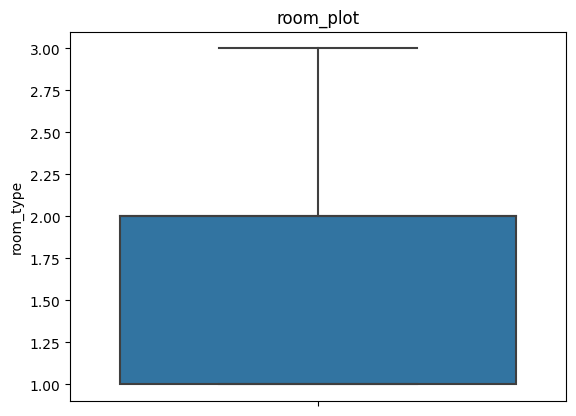

In [34]:
#here i want to detect if there any outlines and the average of room_type
sns.boxplot(y=airbnb["room_type"])
plt.title("room_plot")
plt.show()

# the room _type don't have an outlines

In [35]:
#here i want to detect if there any outlines and the average of room_type
sns.boxplot(y=airbnb["neighbourhood"])
plt.title("neighbourhood_plot")
plt.show()


TypeError: Vertical orientation requires numeric `y` variable.

# here i found out that i can't detect if there are outliers or no because "neighbourhood column" is of type string 

In [36]:
#i have checked the column neighbourhood_group and i foundout that their are limited categories "5" in this column so i will give for every one a unique value 

In [37]:
airbnb["neighbourhood_group"] = airbnb["neighbourhood_group"].replace({"Brooklyn": 1, "Manhattan": 2, "Queens": 3,"Staten Island" :4,"Bronx":5})


In [38]:
airbnb.head(20)

,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_N
0,2787,1,Kensington,1,1,9,0.210000,6,365,149.0
1,2845,2,Midtown,2,1,45,0.380000,2,355,225.0
2,4632,2,Harlem,1,3,0,1.373221,1,365,150.0
3,4869,1,Clinton Hill,2,1,270,4.640000,1,194,89.0
4,7192,2,East Harlem,2,10,9,0.100000,1,0,80.0
5,7322,2,Murray Hill,2,3,74,0.590000,1,129,200.0
6,7356,1,Bedford-Stuyvesant,1,45,49,0.400000,1,0,60.0
7,8967,2,Hell's Kitchen,1,2,430,3.470000,1,220,79.0
8,7490,2,Upper West Side,1,2,118,0.990000,1,0,79.0
9,7549,2,Chinatown,2,1,160,1.330000,4,188,150.0


In [ ]:
#now i have converted the type of neighbourhood_group based on 5 categories now i will convert the neighbourhood to unique integer values

In [39]:
airbnb["neighbourhood"] = pd.factorize(airbnb["neighbourhood"])[0]

In [40]:
data_neighbourhood = airbnb[['neighbourhood']]
data_neighbourhood
#this one is needed next time


,neighbourhood
0,0
1,1
2,2
3,3
4,4
...,...
48890,6
48891,21
48892,2
48893,7


In [ ]:
airbnb
#here i converted the neighbourhood based on the neighbourhood group that is related to it 
# my point is that i want to convert thte string type of the neighbourhood into integer and the values are unique

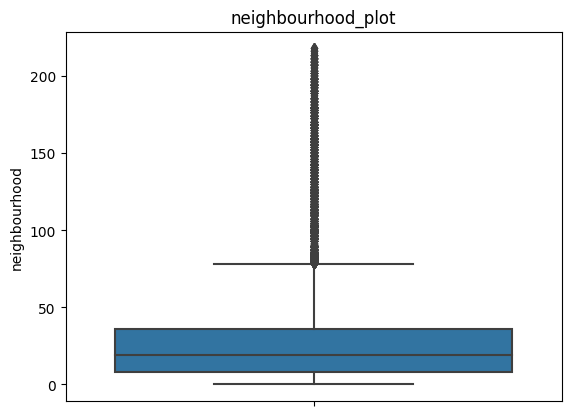

In [41]:
#after this convert of the type i can now check is there are outliers or no
sns.boxplot(y=airbnb["neighbourhood"])
plt.title("neighbourhood_plot")
plt.show()


In [ ]:
# from the graph i get detect that there is outliers

In [42]:
def find_boundaries_neighbourhood(airbnb,variable,distance):
    IQR = airbnb[variable].quantile(0.75) - airbnb[variable].quantile(0.25)
    lower_boundary_neighbourhood = airbnb[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_neighbourhood = airbnb[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary_neighbourhood, lower_boundary_neighbourhood


In [44]:
#upper_boundary_price, lower_boundary_price = find_boundaries_price(airbnb,"prie", 1.5)
upper_boundary_neighbourhood, lower_boundary_neighbourhood = find_boundaries_neighbourhood(airbnb, "neighbourhood", 1.5)
outliers_neighbourhood = np.where((airbnb["neighbourhood"] > upper_boundary_neighbourhood) | (airbnb["neighbourhood"] < lower_boundary_neighbourhood), True, False)


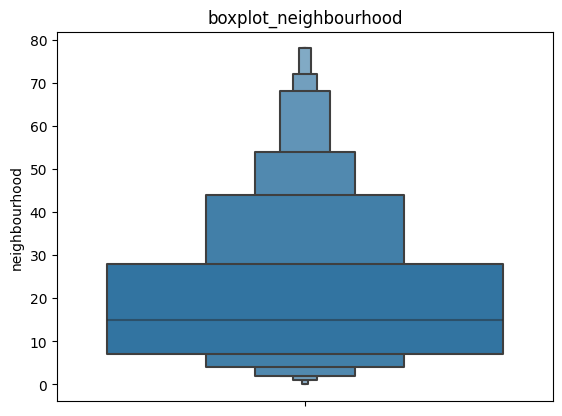

In [45]:
upper_boundary_neighbourhood, lower_boundary_neighbourhood
airbnb = airbnb.loc[~outliers_neighbourhood]
sns.boxenplot(y=airbnb["neighbourhood"])
plt.title("boxplot_neighbourhood")
plt.show()


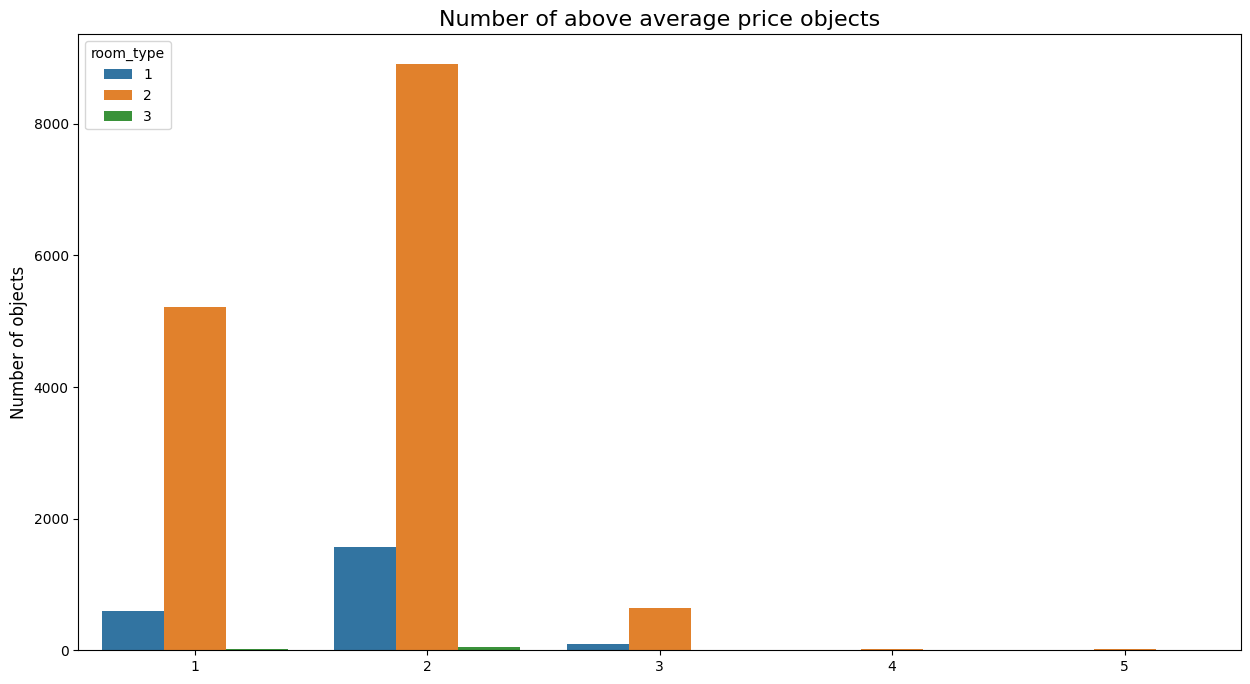

In [46]:
airbnb_above_avg = airbnb[airbnb['price_N'] >= airbnb['price_N'].mean()]
airbnb_above_avg = airbnb_above_avg.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
airbnb_above_avg = airbnb_above_avg.sort_values(by=['count'], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=airbnb_above_avg)
plt.title("Number of above average price objects", fontsize=16)
plt.xlabel(None)
plt.ylabel("Number of objects", fontsize=12)
plt.show()


In [ ]:
#now i want to convert the type of the price_N into integer to make it easier in both training and testing

In [47]:
airbnb['price_N'] = airbnb['price_N'].astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12152\3146639091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price_N'] = airbnb['price_N'].astype(int)


In [48]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41187 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         41187 non-null  int64  
 1   neighbourhood_group             41187 non-null  int64  
 2   neighbourhood                   41187 non-null  int64  
 3   room_type                       41187 non-null  int64  
 4   minimum_nights                  41187 non-null  int64  
 5   number_of_reviews               41187 non-null  int64  
 6   reviews_per_month               41187 non-null  float64
 7   calculated_host_listings_count  41187 non-null  int64  
 8   availability_365                41187 non-null  int64  
 9   price_N                         41187 non-null  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 3.3 MB


# DATA ANALYSIS

Text(0.5, 1.0, 'Neighbourhood vs Price_N')

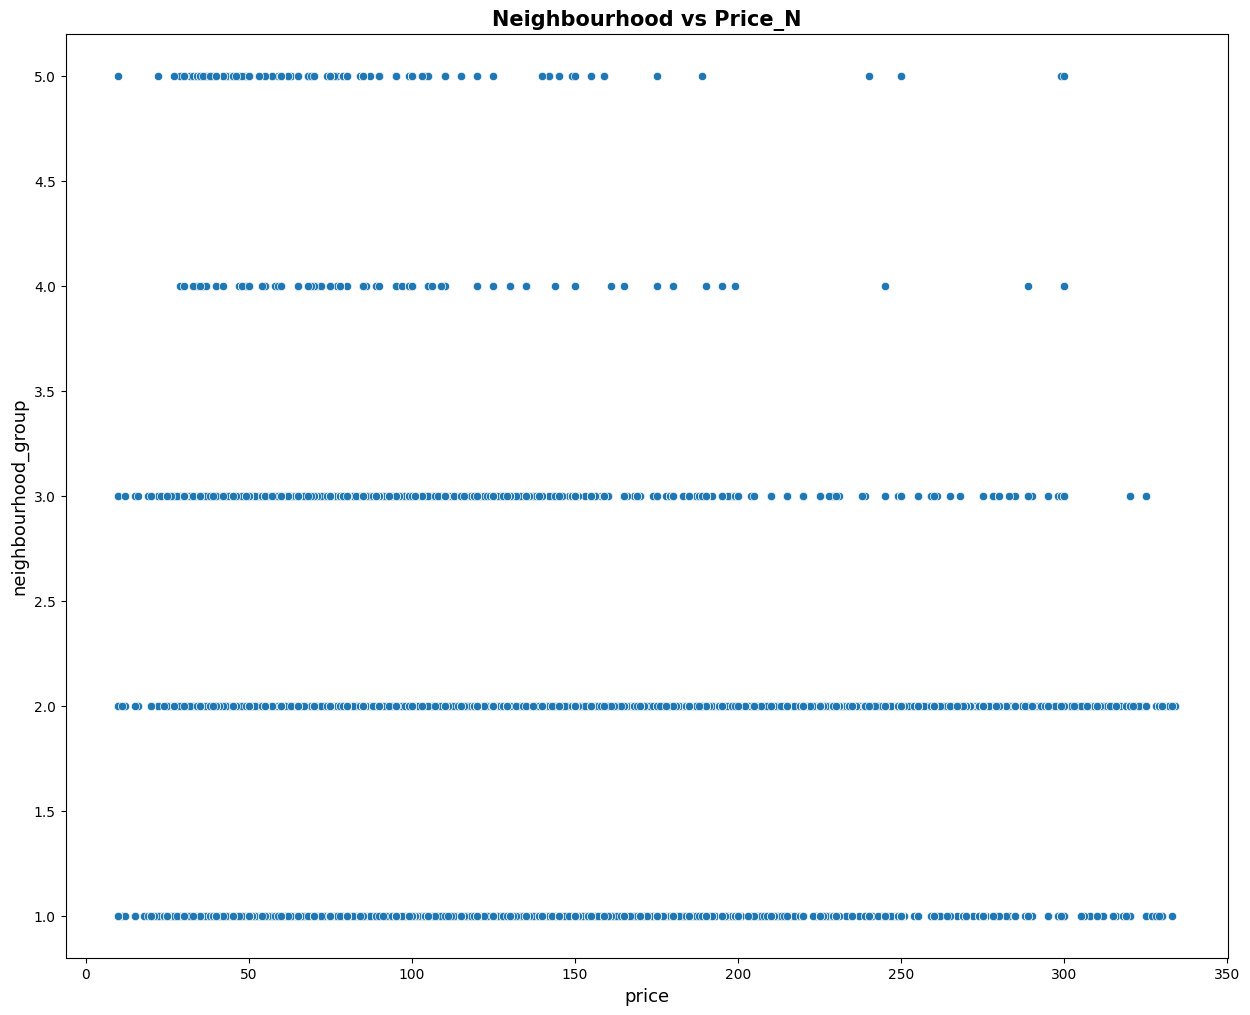

In [49]:
# here i want to get an overview about the relation between price and neighbourhood_group
# i used the "plt " wich is a variable represente the  "matplotlib.pyplot" that is responsable for the graphic representation
# the size of the graph is width=15 and height = 12
plt.figure(figsize=(15,12))
sns.scatterplot(x='price_N', y='neighbourhood_group', data=airbnb)

plt.xlabel("price", size=13)
plt.ylabel("neighbourhood_group", size=13)
plt.title("Neighbourhood vs Price_N",size=15, weight='bold')



 mentionning : 
Manhattan': 1.0
'Brooklyn': 2.0
'Queens': 3.0
'Staten Island': 4.0
'Bronx': 5.0


 i conclude from this graph that the most expensive neighbourhood_groups are brooklyn and Manhattan also queens and in other part the less expensive areas are staten island and bronx

in this graph i represent price and room_type en function of neighbourhood_group to know if the neighbourhood infliences the price or no this commandis defined previously

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

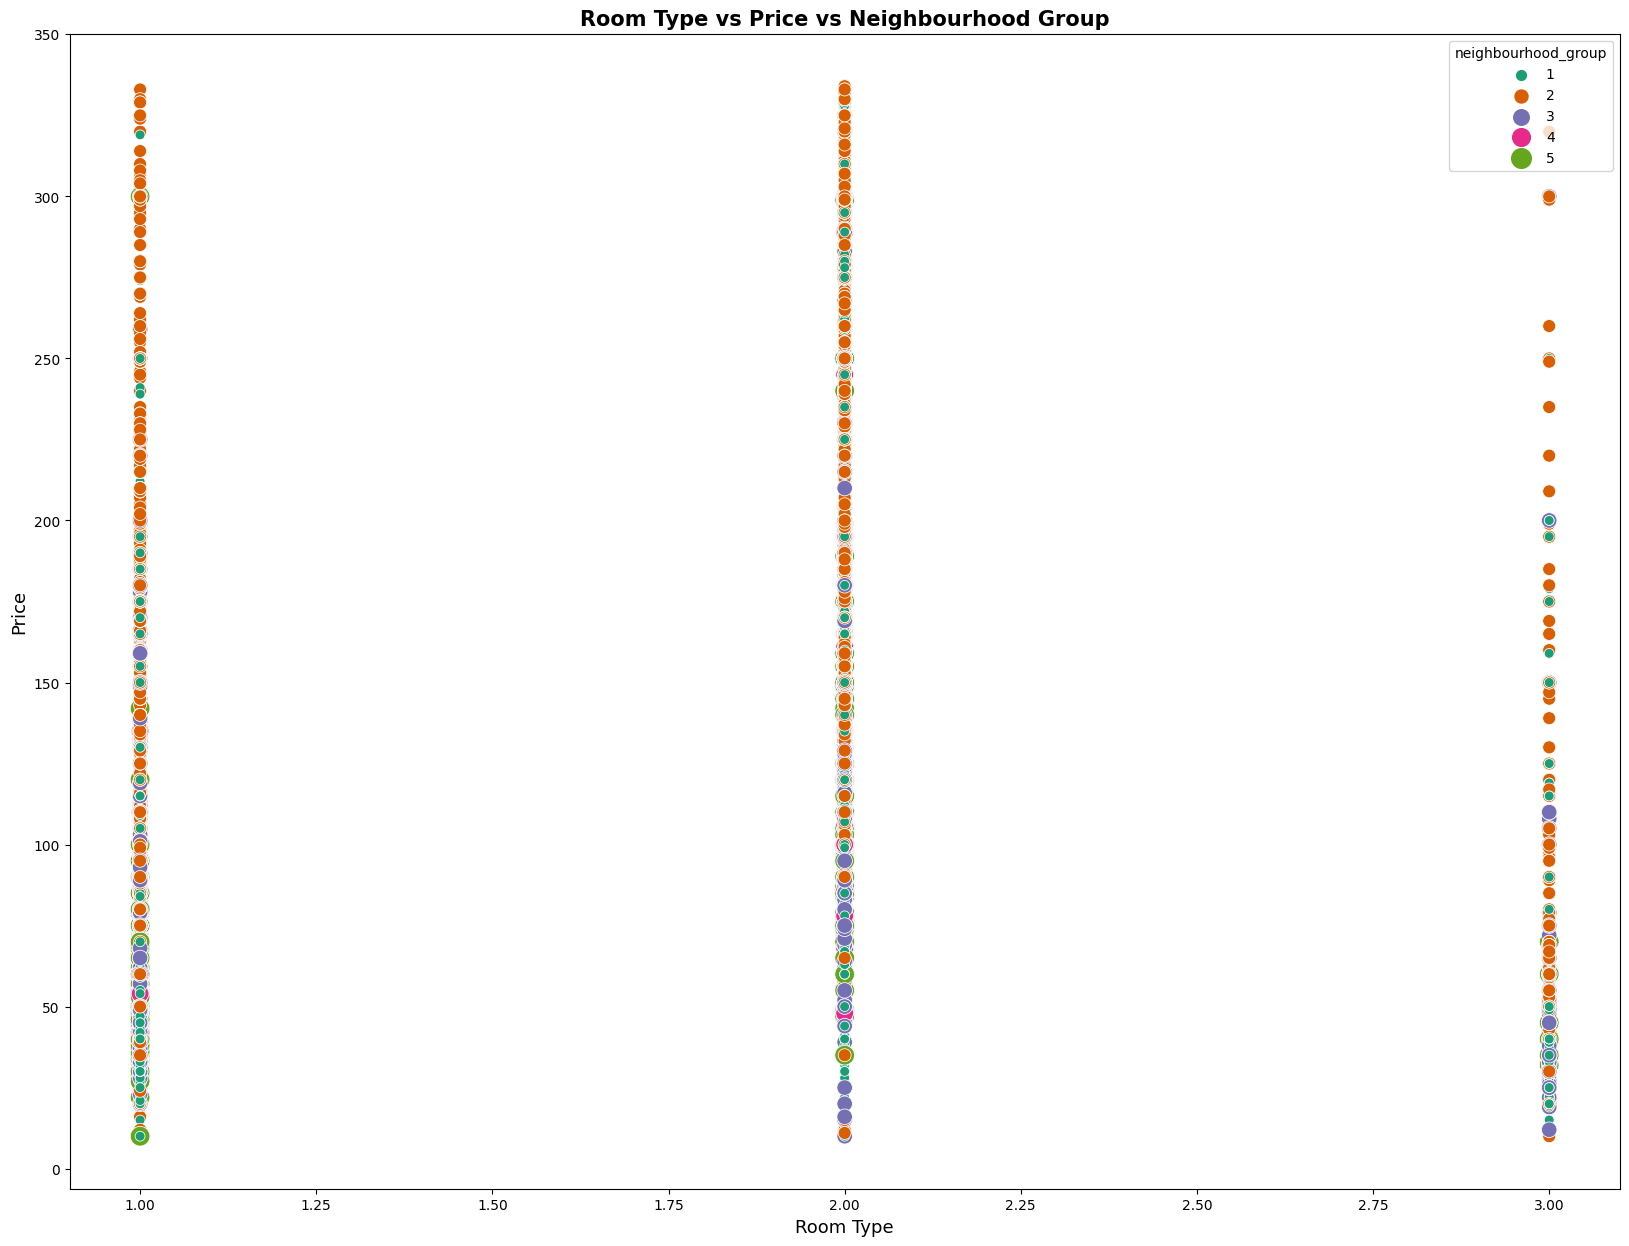

In [50]:
#here i want to anylse if there are any relation between
plt.figure(figsize=(20,15))
#hue is used to color the data
sns.scatterplot(x="room_type", y="price_N",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=airbnb)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')


# TRAINING AND TESTING

In [51]:

airbnb_model = airbnb[['neighbourhood_group','neighbourhood','price_N']]
airbnb_model

,neighbourhood_group,neighbourhood,price_N
0,1,0,149
1,2,1,225
2,2,2,150
3,1,3,89
4,2,4,80
...,...,...,...
48890,1,6,70
48891,1,21,40
48892,2,2,115
48893,2,7,55


here i have splited the dataset into training and testing models based on 70% and 30%

In [52]:

x, y = airbnb_model.iloc[:,:-1], airbnb_model.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

In [53]:
x_train.shape, y_train.shape

((28830, 2), (28830,))

In [54]:
y_test.shape, x_test.shape

((12357,), (12357, 2))

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(x_train,y_train)

linear_train_preds = linear_model.predict(x_train)

In [56]:
x_train

,neighbourhood_group,neighbourhood
29440,2,2
10761,1,34
46728,1,6
20242,1,78
39545,2,27
...,...,...
37224,1,21
10284,1,12
16432,2,5
33373,1,12


In [57]:
x_train.shape, y_train.shape

((28830, 2), (28830,))

# Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(x_train,y_train)
#now i will calculate the mean absolute error for the training 
linear_train_preds = linear_model.predict(x_train)
mean_absolute_error(linear_train_preds, y_train)

55.23440344231531

In [59]:
#here i  calculate the mean absolute error for the testing


linear_test_preds = linear_model.predict(x_test)
mean_absolute_error(linear_test_preds, y_test)

55.00053119618029

# RandomForestRegressor model

In [60]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(x_train, y_train)
rf_train_preds = rf.predict(x_train)
rf_test_preds = rf.predict(x_test)
#now i will calculate the mean absolute error for both training and testing 

mean_absolute_error(linear_train_preds, y_train), mean_absolute_error(linear_test_preds, y_test)

(55.23440344231531, 55.00053119618029)

In [61]:
import pandas as pd
corr_matrix = pd.DataFrame(x_test).corrwith(pd.Series(y_test))
print(corr_matrix)


neighbourhood_group    0.070816
neighbourhood         -0.063476
dtype: float64


In [62]:
airbnb_model

,neighbourhood_group,neighbourhood,price_N
0,1,0,149
1,2,1,225
2,2,2,150
3,1,3,89
4,2,4,80
...,...,...,...
48890,1,6,70
48891,1,21,40
48892,2,2,115
48893,2,7,55


In [63]:
import numpy as np

# calculate the mean absolute percentage error between the predicted prices and the true prices
mape = np.mean(np.abs((rf_test_preds - y_test) / y_test)) * 100

# print the mean absolute percentage error
print('Mean absolute percentage error on test set: {:.2f}%'.format(mape))


Mean absolute percentage error on test set: 50.43%


before i start working on improving the testing result i will start by working on the typeof the input that the user integer and the convert from string to integer

In [64]:
# select a row from the dataset to manually input values
test_row1 = airbnb_model.iloc[20]

# print the selected row
print(test_row1)
N_group = 'Brooklyn'
N ='Williamsburg'

mapping = {
    'Manhattan': 0,
    'Brooklyn': 1,
    'Queens': 2,
    'Staten Island': 3,
    'Bronx': 4
}
# Assume the input string is stored in the variable neighbourhood_group_str
neighbourhood_group = mapping[N_group]

neighbourhood = 3.5

# create a dictionary with the manually input values
input_dict = {'neighbourhood_group': neighbourhood_group,
              'neighbourhood': neighbourhood}

# convert the dictionary into a DataFrame with a single row
input_airbnb_model = pd.DataFrame.from_dict(input_dict, orient='index').T

# predict the price using the trained model and the input DataFrame
predicted_price = linear_model.predict(input_airbnb_model)

# print the predicted price
print(predicted_price)


neighbourhood_group      1
neighbourhood           12
price_N                299
Name: 20, dtype: int64
[122.2154326]


In [65]:
unique_values = airbnb_model['neighbourhood'].unique()

# print the unique values
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78]


In [70]:
y_pred = linear_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $55.00


In [ ]:
#here i've worked on making the a form that shows up to the user to input the neighbourhood and the neighbourhood_group so here i've created a list named mapping tht contains the neighbourhood_group and another list named mapping1 that contains all the neighbourhood here i've used this method of the list to make the test easear for users to input string type and with the help of the lists i convert the type of the input from string to integer depending to the equivalent value .

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train,y_train)

# prompt the user to input the neighbourhood group string
N_group_str = input('Enter neighbourhood group: ')
n_str = input('Enter neighbourhood: ')
df = pd.DataFrame(data_neighbourhood)

# convert the neighbourhood group string to an integer value
mapping = {
    'Manhattan': 1,
    'Brooklyn': 2,
    'Queens': 3,
    'Staten Island': 4,
    'Bronx': 5
}
neighbourhood_group = mapping.get(N_group_str, None)


mapping1 = {
     'Kensington': 1,
'Midtown': 2,
'Harlem': 3,
'Clinton Hill': 4,
'East Harlem': 5,
'Murray Hill': 6,
'Bedford-Stuyvesant': 7,
"Hell's Kitchen": 8,
'Upper West Side': 9,
'Chinatown': 10,
'South Slope': 11,
'West Village': 12,
'Williamsburg': 13,
'Fort Greene': 14,
'Chelsea': 15,
'Crown Heights': 16,
'Park Slope': 17,
'Windsor Terrace': 18,
'Inwood': 19,
'East Village': 20,
'Greenpoint': 21,
'Bushwick': 22,
'Flatbush': 23,
'Lower East Side': 24,
'Prospect-Lefferts Gardens': 25,
'Long Island City': 26,
'Kips Bay': 27,
'SoHo': 28,
'Upper East Side': 29,
'Prospect Heights': 30,
'Washington Heights': 31,
'Woodside': 32,
'Carroll Gardens': 33,
'Gowanus': 34,
'Flatlands': 35,
'Cobble Hill': 36,
'Flushing': 37,
'Sunnyside': 38,
'DUMBO': 39,
'St. George': 40,
'Highbridge': 41,
'Financial District': 42,
'Morningside Heights': 43,
'Jamaica': 44,
'Middle Village': 45,
'Ridgewood': 46,
'NoHo': 47,
'Ditmars Steinway': 48,
'Flatiron District': 49,
'Roosevelt Island': 50,
'Greenwich Village': 51,
'Little Italy': 52,
'East Flatbush': 53,
'Tompkinsville': 54,
'Astoria': 55,
'Clason Point': 56,
'Eastchester': 57,
'Kingsbridge': 58,
'Boerum Hill': 59,
'Brooklyn Heights': 60,
'Two Bridges': 61,
'Queens Village': 62,
'Rockaway Beach': 63,
'Forest Hills': 64,
'Nolita': 65,
'Woodlawn': 66,
'University Heights': 67,
'Gravesend': 68,
'Allerton': 69,
'East New York': 70,
'Theater District': 71,
'Concourse Village': 72,
'Sheepshead Bay': 73,
'Emerson Hill': 74,
'Fort Hamilton': 75,
'Bensonhurst': 76,
'Tribeca': 77,
'Shore Acres': 78,
'Sunset Park': 79,
'Concourse': 80,
'Gramercy': 81,
'Elmhurst': 82,
'Brighton Beach': 83,
'Jackson Heights': 84,
'Cypress Hills': 85,
'St. Albans': 86,
'Arrochar': 87,
'Rego Park': 88,
'Wakefield': 89,
'Clifton': 90,
'Bay Ridge': 91,
'Graniteville': 92,
'Spuyten Duyvil': 93,
'Stapleton': 94,
'Briarwood': 95,
'Ozone Park': 96,
'Columbia St': 97,
'Vinegar Hill': 98,
'Mott Haven': 99,
'Longwood': 100,
'Canarsie': 101,
'Battery Park City': 102,
'Civic Center': 103,
'East Elmhurst': 104,
'New Springville': 105,
'Morris Heights': 106,
'Arverne': 107,
'Cambria Heights': 108,
'Tottenville': 109,
'Mariners Harbor': 110,
'Concord': 111,
'Borough Park': 112,
'Bayside': 113,
'Downtown Brooklyn': 114,
'Port Morris': 115,
'Fieldston': 116,
'Kew Gardens': 117,
'Midwood': 118,
'Mount Eden': 119,
'City Island': 120,
'Glendale': 121,
'Port Richmond': 122,
'Red Hook': 123,
'Richmond Hill': 124,
'Bellerose': 125,
'Maspeth': 126,
'Williamsbridge': 127,
'Soundview': 128,
'Woodhaven': 129,
'Co-op City': 130,
'Stuyvesant Town': 131,
'Parkchester': 132,
'North Riverdale': 133,
'Dyker Heights': 134,
'Bronxdale': 135,
'Riverdale': 136,
'Kew Gardens Hills': 137,
'Bay Terrace': 138,
'Norwood': 139,
'Claremont Village': 140,
'Fordham': 141,
'Bayswater': 142,
'Navy Yard': 143,
'Brownsville': 144,
'Eltingville': 145,
'Fresh Meadows': 146,
'Mount Hope': 147,
'Lighthouse Hill': 148,
'Springfield Gardens': 149,
'Howard Beach': 150,
'Belle Harbor': 151,
'Jamaica Estates': 152,
'Van Nest': 153,
'Morris Park': 154,
'West Brighton': 155,
'College Point': 156,
'Far Rockaway': 157,
'South Ozone Park': 158,
'Tremont': 159,
'Corona': 160,
'Great Kills': 161,
'Manhattan Beach': 162,
'Marble Hill': 163,
'Dongan Hills': 164,
'Castleton Corners': 165,
'East Morrisania': 166,
'Hunts Point': 167,
'Whitestone': 168,
'Pelham Bay': 169,
'Randall Manor': 170,
'Throgs Neck': 171,
'West Farms': 172,
'Silver Lake': 173,
'Morrisania': 174,
'Laurelton': 175,
'Grymes Hill': 176,
'Holliswood': 177,
'Pelham Gardens': 178,
'Belmont': 179,
'Rosedale': 180,
'Edgemere': 181,
'New Brighton': 182,
'Midland Beach': 183,
'Baychester': 184,
'Melrose': 185,
'Sea Gate': 186,
'Bergen Beach': 187,
'Richmondtown': 188,
'Howland Hook': 189,
'Schuylerville': 190,
'Coney Island': 191,
'New Dorp Beach': 192,
"Prince's Bay": 193,
'South Beach': 194
}
neighbourhood = mapping1.get(n_str, None)
if neighbourhood_group is None:
    print('Invalid neighbourhood group')
else:
    # prompt the user to input the neighbourhood string
   # neighbourhood_str = input('Enter neighbourhood: ')
    if neighbourhood is None:
    
        print('invalid neighbourhood')
      
        # create a dictionary with the input values
        
    else:
        input_dict = {'neighbourhood_group': neighbourhood_group,'neighbourhood': neighbourhood}

        # convert the dictionary into a DataFrame with a single row
        input_airbnb_model = pd.DataFrame.from_dict(input_dict, orient='index').T

        # predict the price using the trained model and the input DataFrame
        predicted_price = linear_model.predict(input_airbnb_model)

        # print the predicted price
        print(f'Predicted price: {predicted_price[0]:.2f}')

Enter neighbourhood group: Brooklyn
Enter neighbourhood: Clinton Hill
Predicted price: 131.78
